### K-近邻算法实现

In [2]:
#构建数据集

In [3]:
import pandas as pd

In [4]:
rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
        '打斗镜头':[1,5,12,108,112,115],
        '接吻镜头':[101,89,97,5,9,8],
        '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']} 

In [5]:
moive_data = pd.DataFrame(rowdata)

In [6]:
moive_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [7]:
# 计算已知类别数据集中的点与当前点之间的距离

In [8]:
new_data = [24,67]

In [9]:
dist = list(((moive_data.iloc[:6,1:3]-new_data)**2).sum(1)**0.5)

In [10]:
dist

[41.048751503547585,
 29.068883707497267,
 32.31098884280702,
 104.4030650891055,
 105.39449701004318,
 108.45275469069469]

In [11]:
# 将距离升序排列，然后选取距离最小的k个点

In [12]:
k = 4

In [13]:
dist_l = pd.DataFrame({'dist':dist, 'labels':(moive_data.iloc[:6, 3])})
dr = dist_l.sort_values(by = 'dist')[: k]
dr

,dist,labels
1,29.068884,爱情片
2,32.310989,爱情片
0,41.048752,爱情片
3,104.403065,动作片


In [14]:
# 确定前k个点所在类别的出现频率

In [15]:
re = dr.loc[:,'labels'].value_counts()

In [16]:
re

爱情片    3
动作片    1
Name: labels, dtype: int64

In [17]:
re.index[0]

'爱情片'

In [18]:
result = []
result.append(re.index[0])
result

['爱情片']

#### 封装函数

In [19]:
import pandas as ps
"""
函数功能：KNN分类器
参数说明：
    inX：需要预测分类的数据集
    dataSet：已知分类标签的数据集（训练集）
    k：k-近邻算法参数，选择距离最小的k个点
返回：
    result：分类结果
"""
def classify0(inX, dataSet, k):
    result = []
    dist = list(((dataSet.iloc[:,1:3]-inX)**2).sum(1)**0.5)
    dist_l = pd.DataFrame({'dist':dist, 'labels':(dataSet.iloc[:6, 3])})
    dr = dist_l.sort_values(by = 'dist')[: k]
    re = dr.loc[:,'labels'].value_counts()
    result.append(re.index[0])
    return result

In [20]:
inX = new_data
dataSet = moive_data
k = 4

In [21]:
classify0(inX, dataSet, k)

['爱情片']

### 约会网站匹配效果判定

In [25]:
# 导入数据

In [22]:
datingTest = pd.read_table('datingTestSet.txt', header=None)
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [23]:
datingTest.shape

(1000, 4)

In [24]:
datingTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
0    1000 non-null int64
1    1000 non-null float64
2    1000 non-null float64
3    1000 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 31.3+ KB


In [26]:
# 分析数据

Text(0, 0.5, '每周消费冰淇淋公升数')

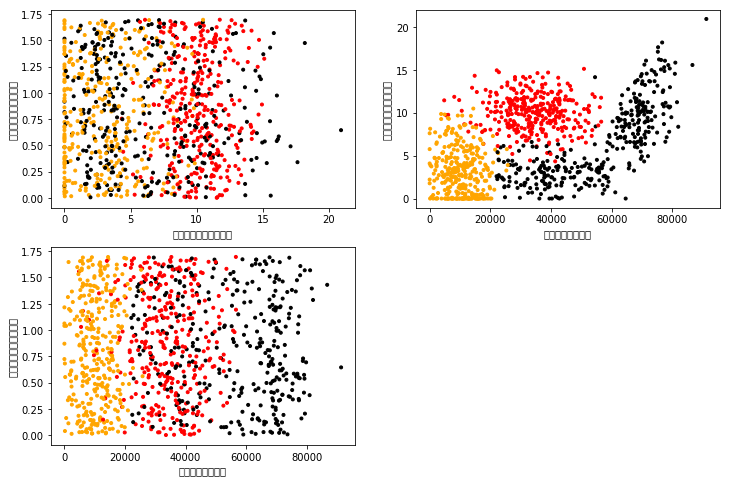

In [43]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 把不同那个标签用颜色区分
Colors = []
for i in range(datingTest.shape[0]):
    m = datingTest.iloc[i, -1]
    if m == 'didntLike':
        Colors.append('black')
    if m == 'smallDoses':
        Colors.append('orange')
    if m == 'largeDoses':
        Colors.append('red')
        
# 绘制两两特征间的散点图
plt.rcParams['font.sans-serif']=[u'Simhei'] # 图中字体设置为黑体
pl = plt.figure(figsize=(12,8))
figl = pl.add_subplot(221)
plt.scatter(datingTest.iloc[:,1], datingTest.iloc[:,2], marker='.', c=Colors)
plt.xlabel('玩游戏视频所占时间比')
plt.ylabel('每周消费冰淇淋公升数')

figl2 = pl.add_subplot(222)
plt.scatter(datingTest.iloc[:,0], datingTest.iloc[:,1], marker='.', c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('玩游戏视频所占时间比')

figl3 = pl.add_subplot(223)
plt.scatter(datingTest.iloc[:,0], datingTest.iloc[:,2], marker='.', c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('每周消费冰淇淋公升数')

In [30]:
"""
函数功能：归一化
参数说明：
    dataSet:原始数据集
返回：0-1标准化之后的数据集
"""

def minmax(dataSet):
    minDf = dataSet.min()
    maxDf = dataSet.max()
    normSet = (dataSet - minDf)/(maxDf - minDf)
    return normSet

In [31]:
datingT = pd.concat([minmax(datingTest.iloc[:, :3]), datingTest.iloc[:, 3]], axis=1)
datingT.head()

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike


In [32]:
# 划分训练集和测试集

In [33]:
"""
函数功能：切分训练集和测试集
参数说明：
    dataSet:原始数据集
    rate:训练集所占比例
返回：切分好的训练集和测试集
"""

def randSplit(dataSet, rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m, :]
    test = dataSet.iloc[m:, :]
    test.index = range(test.shape[0])
    return train, test

In [70]:
train, test = randSplit(datingT)

In [37]:
# k-近邻算法分类

In [40]:
"""
函数功能：k-近邻算法分类器
参数说明：
    train：训练集
    test：测试集
    k：k-近邻参数，即选择距离最小的k个点
返回：预测好分类的测试集
"""

def datingClass(train, test, k):
    n = train.shape[1] - 1
    m = test.shape[0]
    result = []
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) ** 2).sum(1))**0.5)
        dist_l = pd.DataFrame({'dist': dist, 'labels': (train.iloc[:, n])})
        dr = dist_l.sort_values(by = 'dist')[: k]
        re = dr.loc[:, 'labels'].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test['predict'] = result
    acc = (test.iloc[:, -1] == test.iloc[:, -2]).mean()
    print(f'模型预测准确率为{acc}')
    return test

In [41]:
datingClass(train, test, 5)

模型预测准确率为0.95


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,predict
0,0.513766,0.170320,0.262181,didntLike,didntLike
1,0.089599,0.154426,0.785277,smallDoses,smallDoses
2,0.611167,0.172689,0.915245,didntLike,didntLike
3,0.012578,0.000000,0.195477,smallDoses,smallDoses
4,0.110241,0.187926,0.287082,smallDoses,smallDoses
5,0.812113,0.705201,0.681085,didntLike,didntLike
6,0.729712,0.490545,0.960202,didntLike,didntLike
7,0.130301,0.133239,0.926158,smallDoses,smallDoses
8,0.557755,0.722409,0.780811,largeDoses,largeDoses
9,0.437051,0.247835,0.131156,largeDoses,didntLike
